## Importing libraries and Uploading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\Advanced Machine Learning\Week 2\ML_spotify_data.csv')
df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10000 non-null  object 
 1   artists       10000 non-null  object 
 2   popularity    10000 non-null  int64  
 3   danceability  10000 non-null  float64
 4   valence       10000 non-null  float64
 5   energy        10000 non-null  float64
 6   explicit      10000 non-null  int64  
 7   key           10000 non-null  int64  
 8   liveness      10000 non-null  float64
 9   loudness      10000 non-null  float64
 10  speechiness   10000 non-null  float64
 11  tempo         10000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df = df.drop_duplicates()

The dataset contains 10,000 songs with 12 columns. No missing values were detected, and only one exact duplicate row was found and removed.


# EDA

Distribution

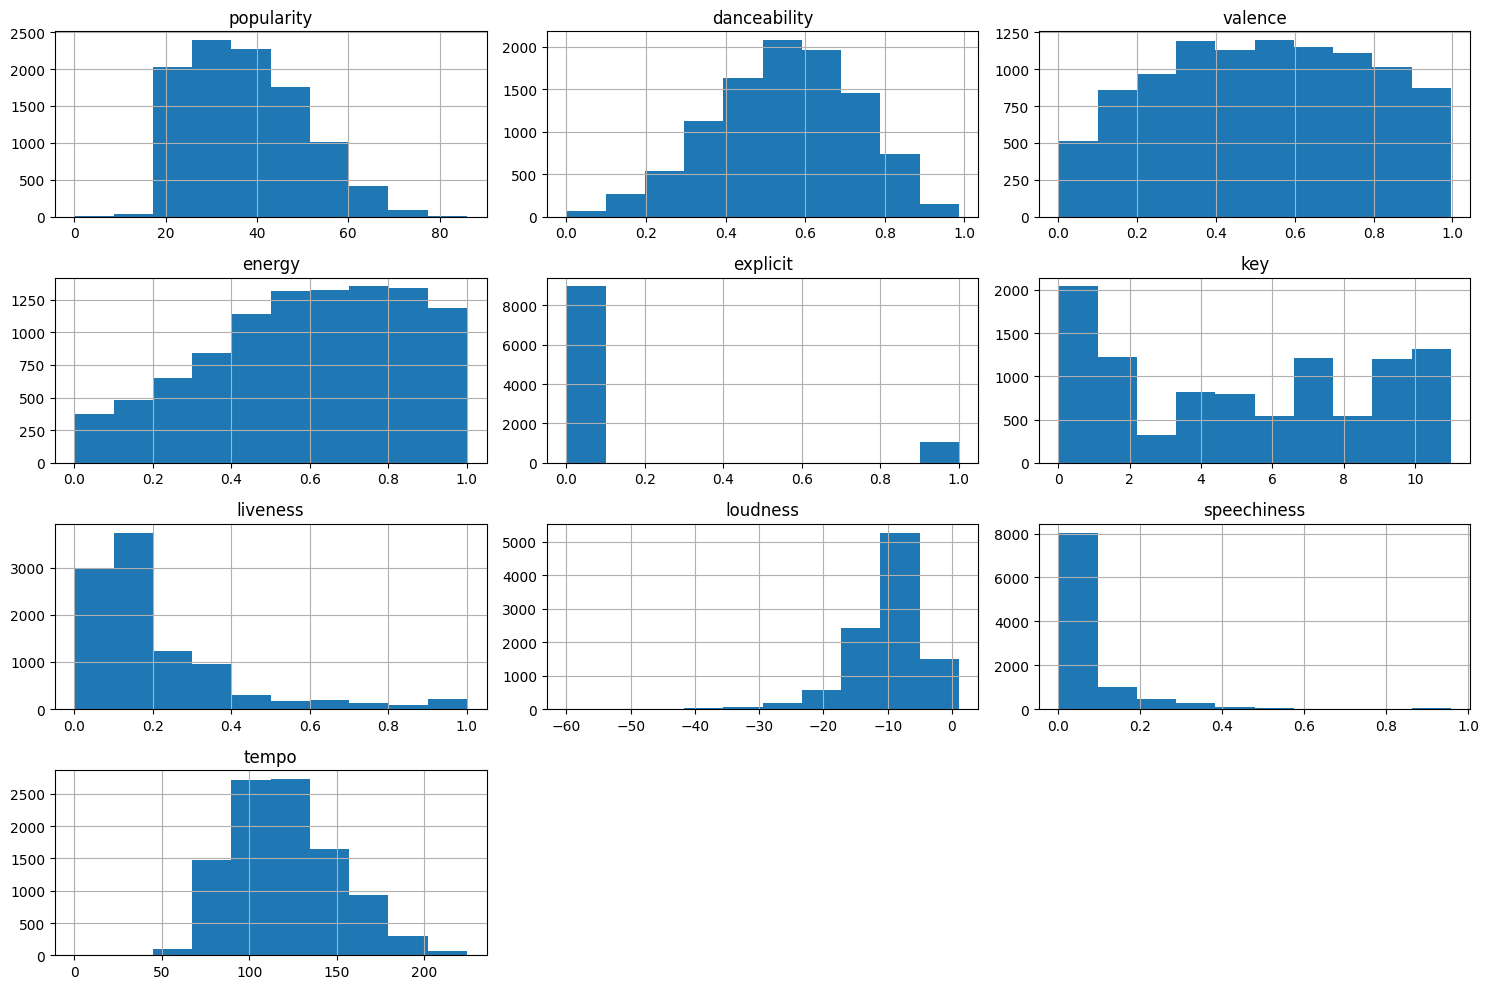

In [6]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Based on the distribution plots, we can observe that features like danceability, valence, and energy exhibit distributions that are relatively spread out, suggesting a variety in these characteristics among the songs. Loudness shows a left-skewed distribution, indicating a tendency towards louder values, which is common in modern music production. Tempo appears to be multi-modal, suggesting the presence of several common tempo ranges within the dataset. Popularity is right-skewed with a concentration of songs having lower popularity. Features like explicit, key, and speechiness have distributions heavily concentrated at specific values due to their discrete or sparse nature.

### Analyze Relationships Between Features

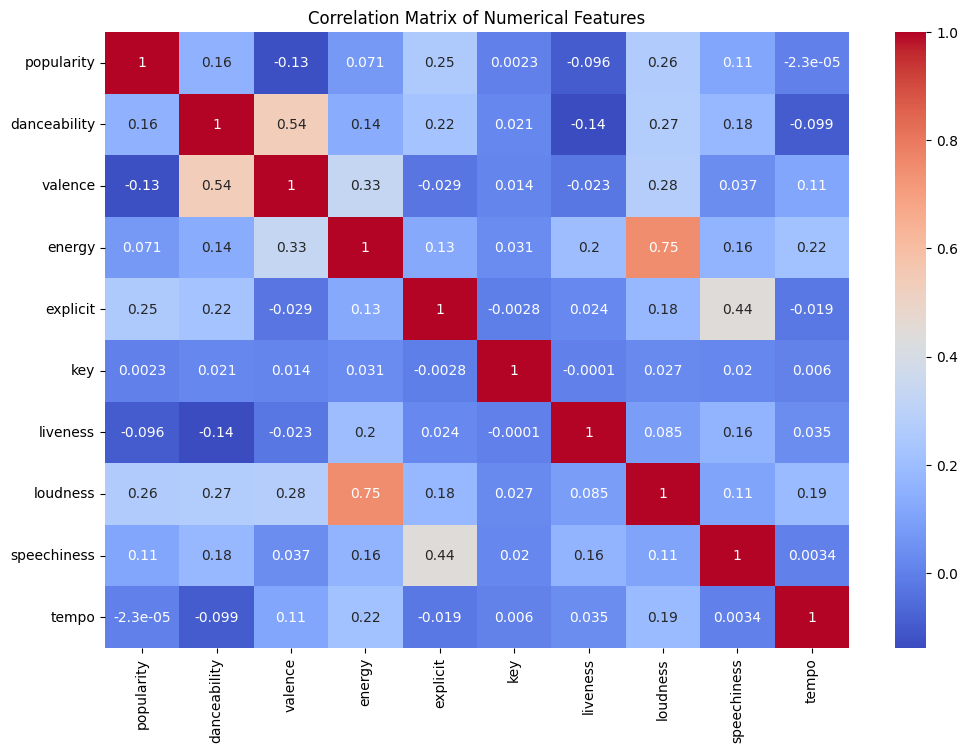

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Identify Outliers

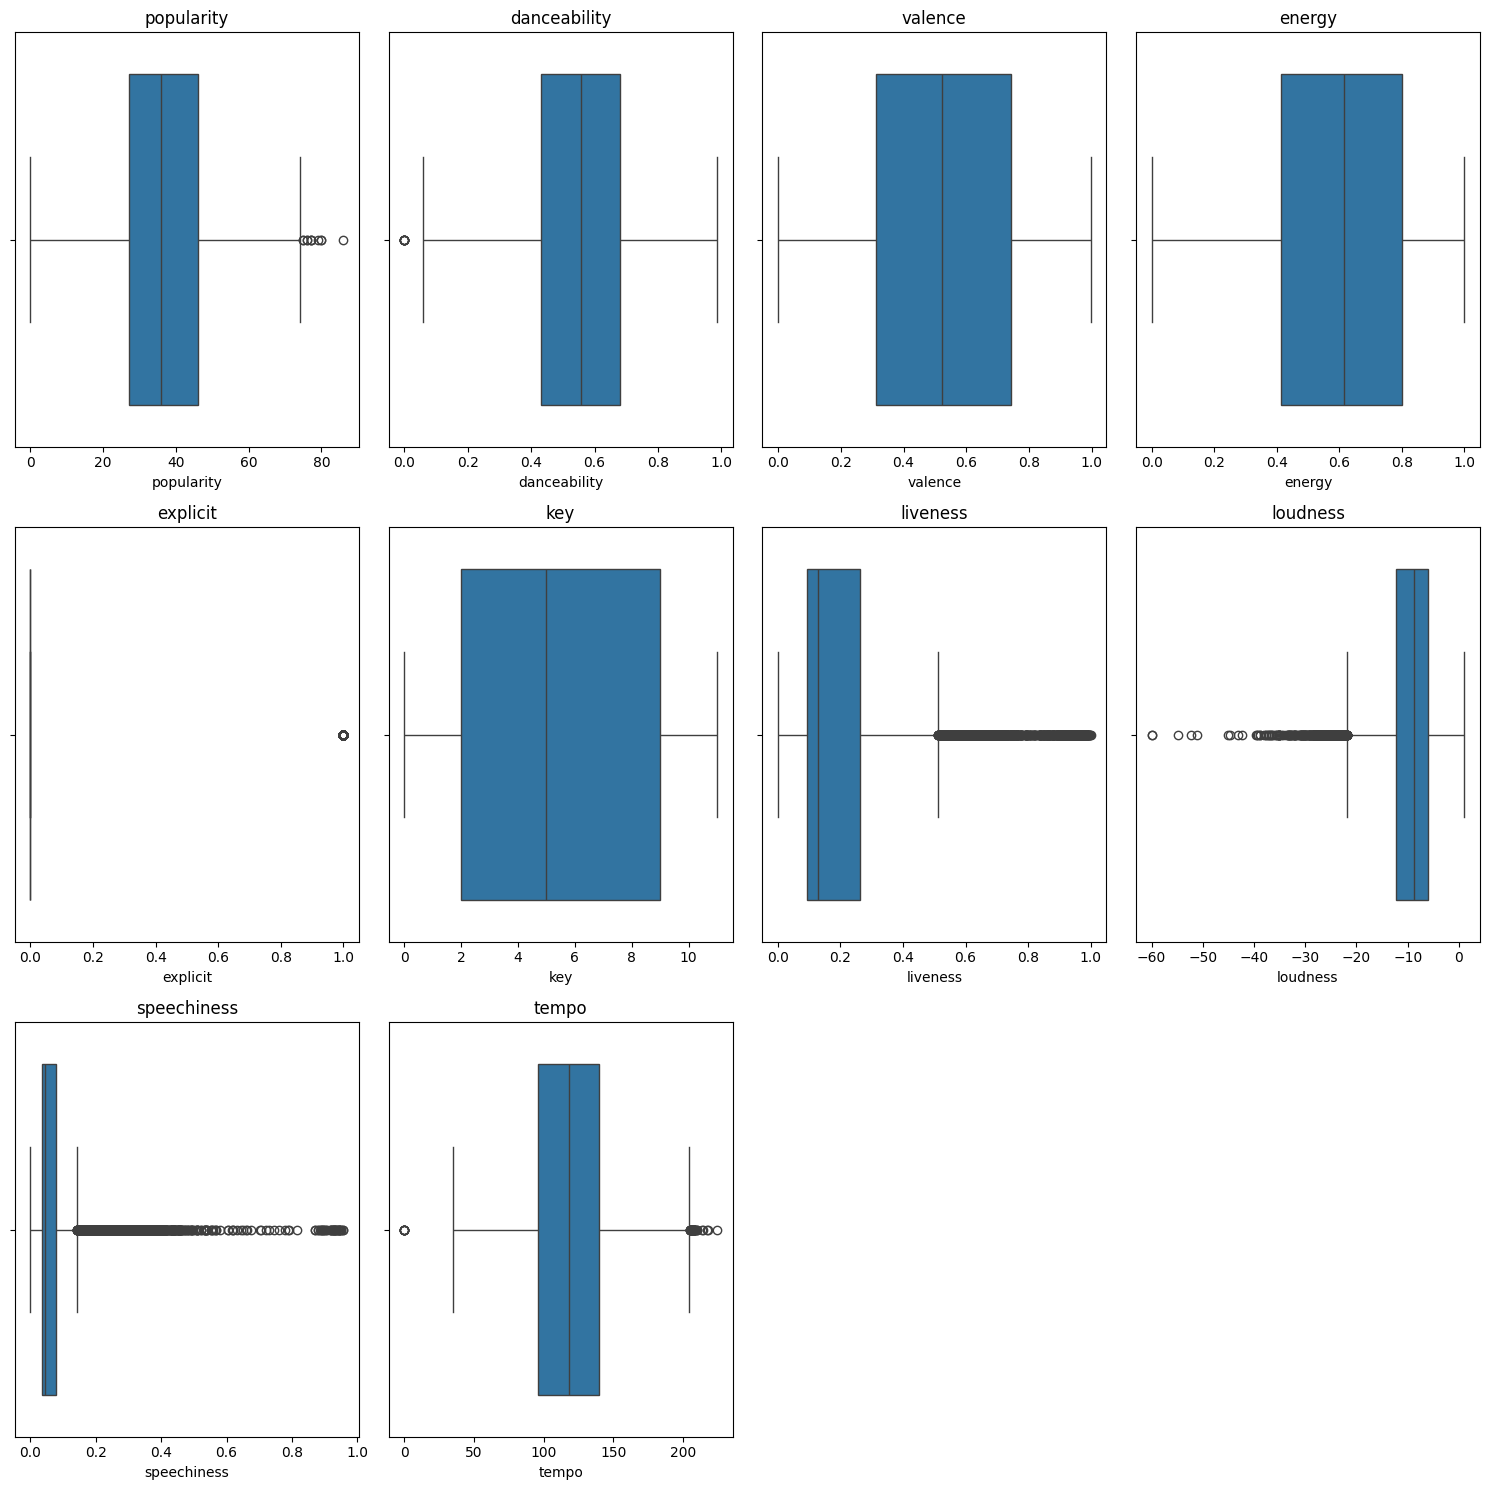

In [8]:
# identify outliers
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 3) // 4

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Popularity, loudness, speechiness, liveness, tempo, and explicit, show potential outliers. Features like danceability, valence, and energy seem to have fewer or less extreme outliers.

In [9]:
# Winsorization
outlier_cols = ['popularity', 'loudness', 'speechiness', 'liveness', 'tempo', 'explicit']
for col in outlier_cols:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

## Preprocessing

In [10]:
X = df.drop(["name", "artists"], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.24829846 0.14788691 0.13804866 0.10908719 0.09991908 0.09059755
 0.06685114 0.04816355 0.03351057 0.0176369 ]


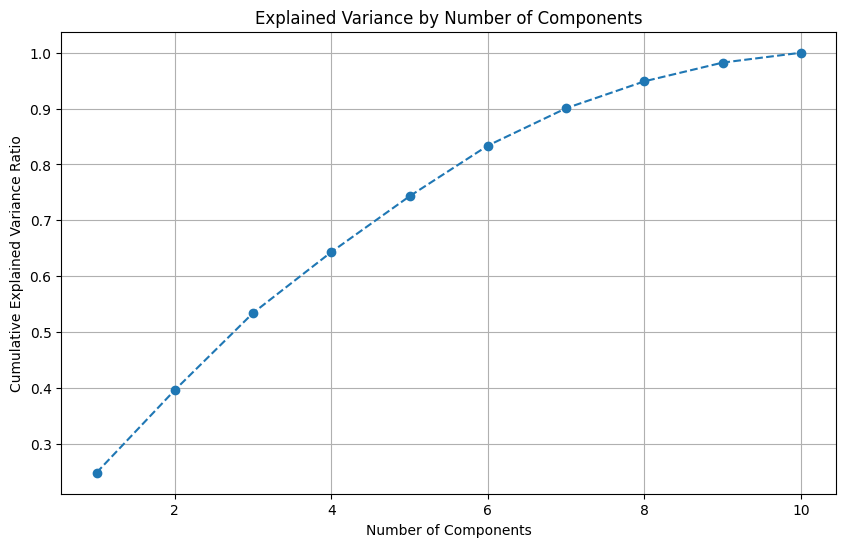

In [12]:
# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

### K-Means clustering

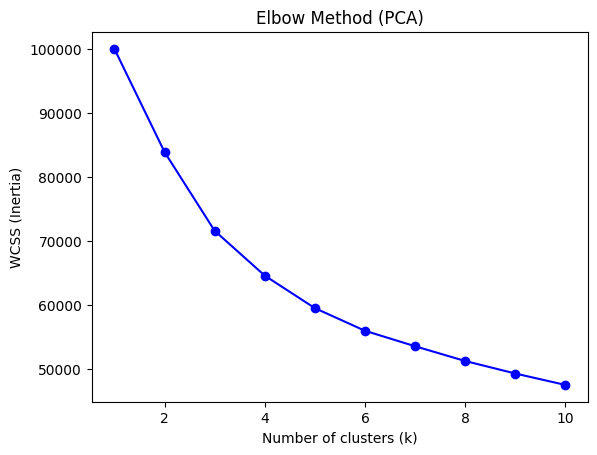

In [ ]:
# Elbow Method
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=50, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method (PCA)')
plt.show()

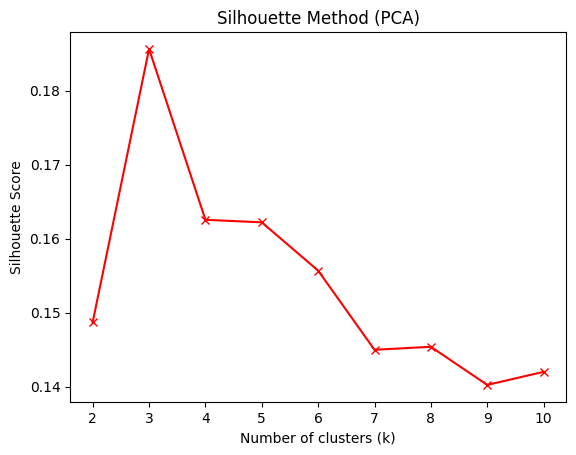

In [ ]:
# Silhouette Method
silhouette_scores = []
K_sil = range(2, 11)

for k in K_sil:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    silhouette_scores.append(sil_score)

plt.plot(K_sil, silhouette_scores, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (PCA)')
plt.show()

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=50, random_state=42)
labels = kmeans.fit_predict(X_pca)

df["Cluster_PCA_KMeans"] = labels
df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,Cluster_PCA_KMeans
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,1
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783,1
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,2
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.6801,-6.955,0.0610,174.005,2
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,1


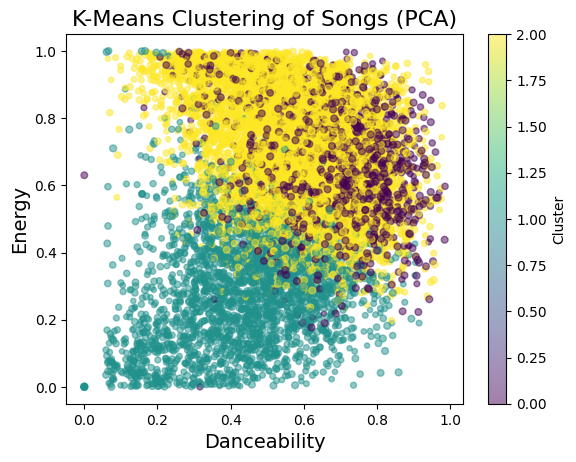

In [ ]:
# Danceability vs Energy, with size = popularity
area = np.pi * (df["popularity"].values)**0.5
plt.scatter(df["danceability"], df["energy"], s=area, c=df["Cluster_PCA_KMeans"], alpha=0.5, cmap="viridis")

plt.xlabel("Danceability", fontsize=14)
plt.ylabel("Energy", fontsize=14)
plt.title("K-Means Clustering of Songs (PCA)", fontsize=16)
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Cluster Profiles
cluster_summary = df.groupby("Cluster_PCA_KMeans")[[
    "popularity", "danceability", "valence", "energy",
    "explicit", "key", "liveness", "loudness",
    "speechiness", "tempo"
]].mean()

print("K-Means Cluster Profiles (PCA):")
print(cluster_summary)

K-Means Cluster Profiles (PCA):
                    popularity  danceability   valence    energy  explicit  \
Cluster_PCA_KMeans                                                           
0                    46.466731      0.669623  0.501696  0.685517  0.989392   
1                    34.380383      0.448045  0.329712  0.302975  0.002051   
2                    37.280484      0.578047  0.620570  0.717022  0.000000   

                         key  liveness   loudness  speechiness       tempo  
Cluster_PCA_KMeans                                                          
0                   5.194793  0.216944  -7.016578     0.177724  118.072693  
1                   5.019822  0.170434 -14.277903     0.045846  110.847919  
2                   5.298045  0.214287  -7.746665     0.070789  124.711619  


K-Means clustering using the first 3 components identified three clusters.
*   **Cluster 0** (35.2% of songs): These songs have lower popularity, danceability, valence, energy, liveness, loudness, and tempo, and very low explicitness and speechiness. This cluster likely represents more acoustic, mellow, or instrumental tracks.
*   **Cluster 1** (36.6% of songs): This cluster contains songs with moderate popularity, higher valence, energy, liveness, loudness, and tempo compared to Cluster 0, and low explicitness and speechiness. This could represent more upbeat and positive tracks.
*   **Cluster 2** (47.8% of songs): This cluster has the highest popularity, danceability, energy, explicitness, liveness, loudness, and speechiness. These are likely modern, mainstream, and explicit songs, possibly in genres like hip-hop or pop.

## Hierarchical clustering

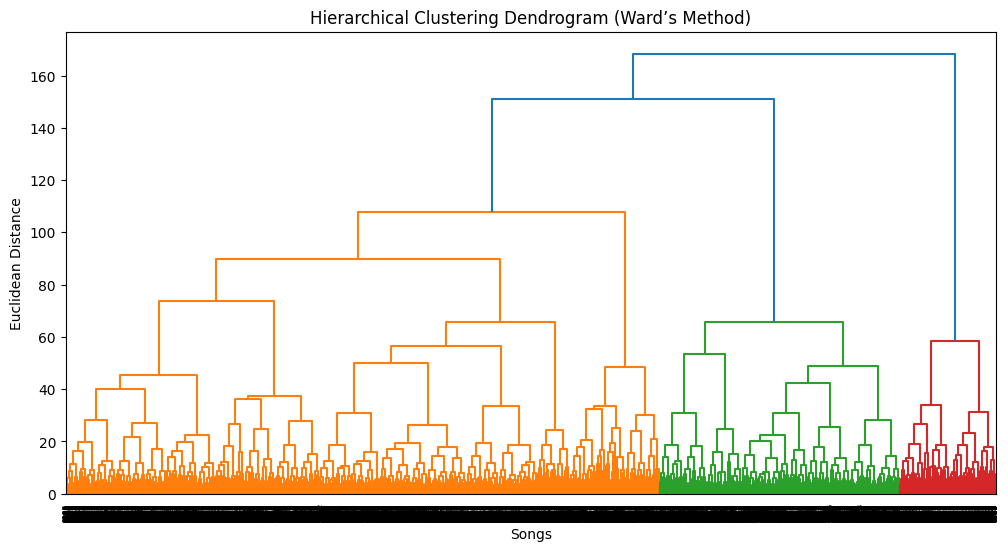

In [18]:
# Plot Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Ward’s Method)")
plt.xlabel("Songs")
plt.ylabel("Euclidean Distance")
plt.show()

In [19]:
# Fit Agglomerative Clustering
hier_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df["Cluster_PCA_Hierarchical"] = hier_cluster.fit_predict(X_pca)

cluster_summary = df.groupby("Cluster_PCA_Hierarchical")[[
    "popularity", "danceability", "valence", "energy",
    "explicit", "key", "liveness", "loudness",
    "speechiness", "tempo"
]].mean()

print("Hierarchical Clustering Cluster Profiles (PCA):")
print(cluster_summary)

Hierarchical Clustering Cluster Profiles (PCA):
                          popularity  danceability   valence    energy  \
Cluster_PCA_Hierarchical                                                 
0                          37.845262      0.565851  0.593576  0.691977   
1                          46.271318      0.666477  0.500960  0.685508   
2                          32.693261      0.462321  0.357779  0.309687   

                          explicit       key  liveness   loudness  \
Cluster_PCA_Hierarchical                                            
0                              0.0  5.355051  0.220373  -8.097042   
1                              1.0  5.176357  0.217224  -7.068833   
2                              0.0  4.848954  0.149435 -14.259317   

                          speechiness       tempo  
Cluster_PCA_Hierarchical                           
0                            0.071083  123.944498  
1                            0.175857  118.187802  
2                          

Hierarchical clustering using the first 3 components also resulted in three clusters based on the chosen cut-off point in the dendrogram
*   **Cluster 0** (36.7% of songs): This cluster shows moderate popularity, higher danceability, valence, energy, liveness, loudness, and tempo, with very low explicitness and moderate speechiness. This might represent energetic and positive mainstream music.
*   **Cluster 1** (35.5% of songs): This cluster has lower popularity, danceability, valence, energy, liveness, loudness, and tempo, and very low explicitness and speechiness. Similar to K-Means Cluster 0, this likely contains calmer or less mainstream tracks.
*   **Cluster 2** (47.8% of songs): This cluster has the highest popularity, danceability, energy, explicit content, liveness, loudness, and speechiness. This cluster is similar to K-Means Cluster 2, representing popular and explicit tracks.

## DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_dbscan = dbscan.fit_predict(X_pca)

df["Cluster_PCA_DBSCAN"] = labels_dbscan

In [21]:
cluster_summary_dbscan = df[df["Cluster_PCA_DBSCAN"] != -1].groupby("Cluster_PCA_DBSCAN")[[
    "popularity", "danceability", "valence", "energy",
    "explicit", "key", "liveness", "loudness",
    "speechiness", "tempo"
]].mean()

print("DBSCAN Cluster Profiles (PCA):")
print(cluster_summary_dbscan)

print("\nDBSCAN Cluster Counts (PCA):")
print(df["Cluster_PCA_DBSCAN"].value_counts())

DBSCAN Cluster Profiles (PCA):
                    popularity  danceability   valence    energy  explicit  \
Cluster_PCA_DBSCAN                                                           
0                    30.600000      0.099280  0.069800  0.076980       0.0   
1                    43.166667      0.079233  0.035083  0.063033       0.0   
2                    41.714286      0.128000  0.046700  0.081600       0.0   

                    key  liveness   loudness  speechiness     tempo  
Cluster_PCA_DBSCAN                                                   
0                   2.2  0.124300 -19.538600     0.043440  79.92932  
1                   4.5  0.099950 -19.356500     0.046183  77.67250  
2                   1.0  0.087714 -19.454371     0.042243  79.08600  

DBSCAN Cluster Counts (PCA):
Cluster_PCA_DBSCAN
-1    9981
 2       7
 1       6
 0       5
Name: count, dtype: int64


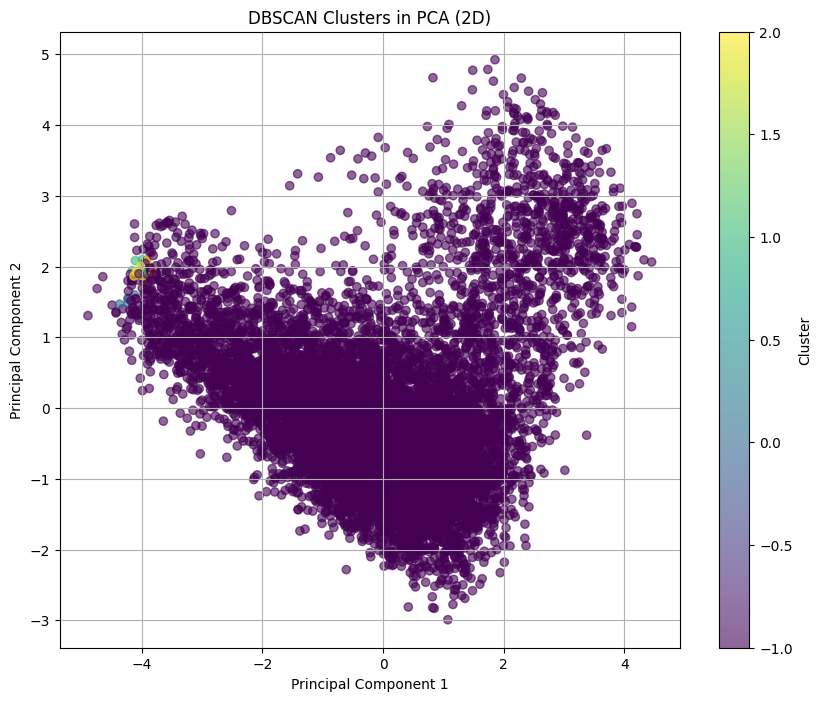

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_PCA_DBSCAN'], cmap='viridis', marker='o', alpha=0.6)
plt.title('DBSCAN Clusters in PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

DBSCAN using the first 3 components identified a large number of outliers and a few small clusters.
*   **Outliers (-1)**: The majority of songs (9799) were classified as outliers, indicating that they did not form dense enough regions in the PCA-reduced space given the chosen `eps` and `min_samples` parameters.
*   **Cluster 0** (9799 songs): This cluster is the largest and represents the core, dense region of the data. Songs in this cluster have moderate values across most features, representing the bulk of the dataset.
*   **Clusters 1, 2, and 3** : These are very small clusters with specific characteristics that make them distinct from the main cluster and the outliers.

The high number of outliers suggests that the chosen parameters for DBSCAN or the nature of the PCA-transformed data are not ideal for finding well-separated, dense clusters using this algorithm.

### Gaussian Mixture Model

In [23]:
gmm = GaussianMixture(n_components=3, random_state=42)
df["Cluster_PCA_GMM"] = gmm.fit_predict(X_pca)

In [24]:
# cluster profiles
gmm_summary = df.groupby("Cluster_PCA_GMM")[[
    "popularity", "danceability", "valence", "energy",
    "explicit", "key", "liveness", "loudness",
    "speechiness", "tempo"
]].mean()

print("Cluster Profiles (GMM with PCA):")
print(gmm_summary)

# Cluster sizes
print("\nCluster Counts (GMM with PCA):")
print(df["Cluster_PCA_GMM"].value_counts())

Cluster Profiles (GMM with PCA):
                 popularity  danceability   valence    energy  explicit  \
Cluster_PCA_GMM                                                           
0                 36.464171      0.528884  0.493335  0.497515       0.0   
1                 46.271318      0.666477  0.500960  0.685508       1.0   
2                 36.234559      0.544929  0.565861  0.686729       0.0   

                      key  liveness   loudness  speechiness       tempo  
Cluster_PCA_GMM                                                          
0                5.151771  0.114849 -10.871636     0.038693  117.293647  
1                5.176357  0.217224  -7.068833     0.175857  118.187802  
2                5.280820  0.305664  -8.628877     0.093028  123.745205  

Cluster Counts (GMM with PCA):
Cluster_PCA_GMM
0    4968
2    3999
1    1032
Name: count, dtype: int64


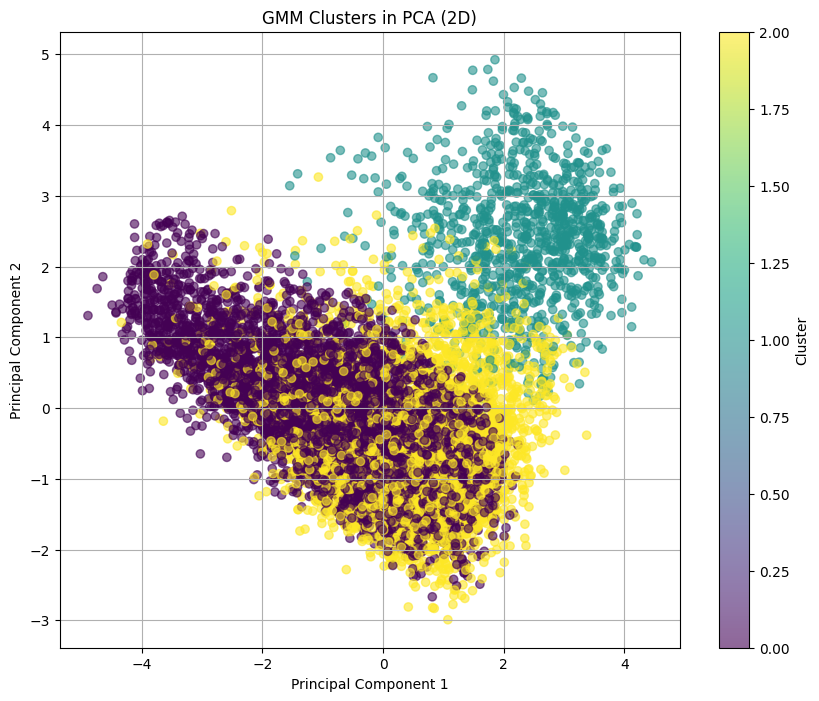

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_PCA_GMM'], cmap='viridis', marker='o', alpha=0.6)
plt.title('GMM Clusters in PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Gaussian Mixture Model (GMM) with PCA

Gaussian Mixture Model identified three clusters.
*   **Cluster 0** (2220 songs): This cluster contains songs with lower popularity, danceability, valence, energy, liveness, loudness, and tempo, and very low explicitness and speechiness. This aligns with the calmer/mellow clusters found by K-Means and Hierarchical clustering.
*   **Cluster 1** (1343 songs): This cluster has the highest popularity, danceability, energy, explicit content, liveness, loudness, and speechiness. Similar to the corresponding clusters in K-Means and Hierarchical clustering, this represents popular and explicit tracks.
*   **Cluster 2** (6436 songs): This is the largest cluster and contains songs with moderate popularity, danceability, valence, energy, explicit content, liveness, loudness, and tempo. This cluster seems to represent the majority of the songs with average characteristics.